In [1]:
%load_ext lab_black

In [2]:
import numpy as np
import pandas as pd
import graphviz
import lingam
from lingam.utils import make_dot

print([np.__version__, pd.__version__, graphviz.__version__, lingam.__version__])

np.set_printoptions(precision=3, suppress=True)
np.random.seed(100)

['1.21.4', '1.3.4', '0.19.1', '1.5.4']


#### Test data

In [3]:
n = 1000
e = lambda n: np.random.laplace(0, 1, n)
x3 = e(n)
x2 = 0.3 * x3 + e(n)
x1 = 0.3 * x3 + 0.3 * x2 + e(n)
x0 = 0.3 * x2 + 0.3 * x1 + e(n)
x4 = 0.3 * x1 + 0.3 * x0 + e(n)
X = pd.DataFrame(
    np.array([x0, x1, x2, x3, x4]).T, columns=["x0", "x1", "x2", "x3", "x4"]
)
X.head()

,x0,x1,x2,x3,x4
0,-3.180151,-1.488256,-2.864768,0.090811,-0.625644
1,-1.001368,-3.387953,-0.444264,-0.585659,-3.756419
2,0.778307,1.016466,2.320717,-0.163655,-0.421216
3,0.280522,3.000511,-0.460115,1.169740,-0.432969
4,0.937920,-1.459414,-1.892795,-4.663042,0.581040


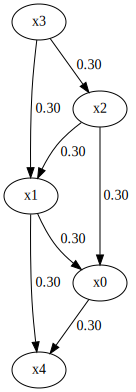

In [4]:
m = np.array(
    [
        [0.0, 0.3, 0.3, 0.0, 0.0],
        [0.0, 0.0, 0.3, 0.3, 0.0],
        [0.0, 0.0, 0.0, 0.3, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0],
        [0.3, 0.3, 0.0, 0.0, 0.0],
    ]
)

make_dot(m)

#### DirectLiNGAM_Kernelで構造方程式モデルを推測

In [5]:
model = lingam.DirectLiNGAM(measure="kernel")
model.fit(X)

/tmp/Python/python-3.9.9/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/tmp/Python/python-3.9.9/lib/python3.9/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a Stand

In [6]:
model.causal_order_

[3, 2, 1, 0, 4]

In [7]:
model.adjacency_matrix_

array([[ 0.   ,  0.331,  0.31 , -0.087,  0.   ],
       [ 0.   ,  0.   ,  0.356,  0.295,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.301,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.213,  0.274,  0.   ,  0.   ,  0.   ]])

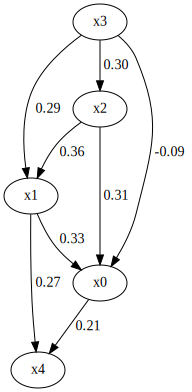

In [8]:
make_dot(model.adjacency_matrix_)